## Project Concept

#Research Question:
## How have political affiliations (as measured by partyid) influenced opinions about the removal of books from public libraries based on contentious content addressing racist beliefs against Blacks, anti-US sentiments from Islamic religious leaders, and anti-religious sentiments, varied by political affiliation (as measured by partyid) from 2008 to 2022?

Specifically, this research will delve into content that addresses racial beliefs, which often resonate with liberal values; sentiments against U.S. expressed by Islamic religious leaders, a topic with more moderate political undertones; and anti-religious sentiments, a subject that can draw strong responses from conservatives. The aim is to decipher the nuances of political beliefs in the context of freedom of speech, challenging the stereotypical binaries associated with liberal and conservative labels, and exploring the multifaceted nature of societal values."

Our data came from the General Social Survey.
Based on the codebook (chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://gss.norc.org/Documents/codebook/GSS%202022%20Codebook.pdf)
#The variables explored were:
### librac:
If some people in your community suggested that a book this person wrote which said Blacks are inferior should be taken out of your publiclibrary, would you favor removing this book, or not?

### libracy:
(Gender netural version)(Or consider a person who believes that Blacks are genetically inferior…) If some people in your community suggested that a book this person wrote which said Blacks are inferior should be taken out of your public library, would you favor removing this book, or not?


###libmslm:
(Now consider a Islamic religious leader who preaches hatred of the United States…) If some people in your community suggested that a book this person wrote which preaches hatred of the United States should be taken out of your public library, would you favor removing this book, or not?


###libmsly:
(Gender netural version) (Now consider a Islamic religious leader who preaches hatred of the United States…) If some people in your community suggested that a book this person wrote which preaches hatred of


###libath:
(There are always some people whose ideas are considered bad or dangerous by other people. For instance, somebody who is against all churches and religion…) If some people in your community suggested that a book this person wrote against churches and religion should be taken out of your public library, would you favor removing this book, or not?


###libathy:
(Gender nutural version) (There are always some people whose ideas are considered bad or dangerous by other people. For instance, somebody who is against all churches and religion…) If some people in your community suggested that a book this person wrote against churches and religion should be taken out of your public library, would you favor removing this book, or not?


###partyid:
Generally speaking, do you usually think of yourself as a Republican, Democrat, Independent, or what?


###year:
The year that the survey occurred.

#What is the research strategy, and is it appropriate to research question?


## Wrangling

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
import pandas as pd

var_list = ['libracy', 'librac', 'libmslmy', 'libmslm', 'libathy', 'libath', 'partyid', 'year']
output_file = 'gss_data_url.csv'
modes = ['w', 'a']
phase = 0

for k in range(37):
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1 + k) + '.csv'
    print(url)
    df = pd.read_csv(url, low_memory=False)

    if phase == 0:

        df[var_list].to_csv(output_file, mode=modes[phase], header=True, index=False)
    else:

        df[var_list].to_csv(output_file, mode=modes[phase], header=False, index=False)

    phase = 1
    k += 1


https://github.com/DS3001/gss_zip/raw/main/gss_1.csv
https://github.com/DS3001/gss_zip/raw/main/gss_2.csv
https://github.com/DS3001/gss_zip/raw/main/gss_3.csv
https://github.com/DS3001/gss_zip/raw/main/gss_4.csv
https://github.com/DS3001/gss_zip/raw/main/gss_5.csv
https://github.com/DS3001/gss_zip/raw/main/gss_6.csv
https://github.com/DS3001/gss_zip/raw/main/gss_7.csv
https://github.com/DS3001/gss_zip/raw/main/gss_8.csv
https://github.com/DS3001/gss_zip/raw/main/gss_9.csv
https://github.com/DS3001/gss_zip/raw/main/gss_10.csv
https://github.com/DS3001/gss_zip/raw/main/gss_11.csv
https://github.com/DS3001/gss_zip/raw/main/gss_12.csv
https://github.com/DS3001/gss_zip/raw/main/gss_13.csv
https://github.com/DS3001/gss_zip/raw/main/gss_14.csv
https://github.com/DS3001/gss_zip/raw/main/gss_15.csv
https://github.com/DS3001/gss_zip/raw/main/gss_16.csv
https://github.com/DS3001/gss_zip/raw/main/gss_17.csv
https://github.com/DS3001/gss_zip/raw/main/gss_18.csv
https://github.com/DS3001/gss_zip/raw

In [3]:
df = pd.read_csv(output_file)

In [4]:
#Observing the orginal data:
df.shape[0] #amount of orginal rows: 72390
#Observing the values in each variable:
df['librac'].unique() # [nan 'remove' 'not remove']
df['libmslm'].unique() #[nan 'not remove' 'remove']
df['libath'].unique() # ['not remove' 'remove' nan]
df['partyid'].unique() # ['independent, close to democrat' 'not very strong democrat' 'independent (neither, no response)' 'strong democrat' 'not very strong republican' 'independent, close to republican' 'strong republican' 'other party' nan]
df['year'].unique() #[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010 2012 2014 2016 2018 2021 2022]
# The code book states that for 'librac','libmslm', 'libath' there should be both a label 'remove' and 'not reme'as well as 'reserved codes' like 'don't know', 'not applicable', 'skipped on web' it seems that the reserved data is not in the dataset
#Observe the amount of missing data there is for each variable:
df[['librac','libracy','libmslm','libmslmy', 'libath', 'libathy', 'partyid']].isna().sum() #librac: 34340, libracy: 69898, libmslm: 60970, libmslmy: 69895, libath: 29700 libathy: 69888, partyid: 485,dtype: int64
# Group by 'year' and count values for each variable
df.groupby('year')[['librac','libracy','libmslm','libmslmy', 'libath', 'libathy', 'partyid']].count()


,librac,libracy,libmslm,libmslmy,libath,libathy,partyid
year,,,,,,,
1972,0,0,0,0,1552,0,1607
1973,0,0,0,0,1471,0,1493
1974,0,0,0,0,1445,0,1461
1975,0,0,0,0,0,0,1485
1976,1437,0,0,0,1461,0,1495
1977,1483,0,0,0,1498,0,1518
1978,0,0,0,0,0,0,1527
1980,1411,0,0,0,1430,0,1465
1982,1771,0,0,0,1790,0,1851


In [5]:
#Compare the responses to the gender-neutral question with the original question by using a portition to see if changing the wording of the question to remove gender-specific language had an impact on individual responses.
librac_remove_percentage = (df['librac'] == 'remove').sum() / df['librac'].notna().sum() * 100
librac_not_remove_percentage = (df['librac'] == 'not remove').sum() / df['librac'].notna().sum() * 100
libracy_remove_percentage = (df['libracy'] == 'remove').sum() / df['libracy'].notna().sum() * 100
libracy_not_remove_percentage = (df['libracy'] == 'not remove').sum() / df['libracy'].notna().sum() * 100
libmslm_remove_percentage = (df['libmslm'] == 'remove').sum() / df['libmslm'].notna().sum() * 100
libmslm_not_remove_percentage = (df['libmslm'] == 'not remove').sum() / df['libmslm'].notna().sum() * 100
libmslmy_remove_percentage = (df['libmslmy'] == 'remove').sum() / df['libmslmy'].notna().sum() * 100
libmslmy_not_remove_percentage = (df['libmslmy'] == 'not remove').sum() / df['libmslmy'].notna().sum() * 100
libath_remove_percentage = (df['libath'] == 'remove').sum() / df['libath'].notna().sum() * 100
libath_not_remove_percentage = (df['libath'] == 'not remove').sum() / df['libath'].notna().sum() * 100
libathy_remove_percentage = (df['libathy'] == 'remove').sum() / df['libathy'].notna().sum() * 100
libathy_not_remove_percentage = (df['libathy'] == 'not remove').sum() / df['libathy'].notna().sum() * 100
# librac - remove: 35.38%, not remove: 64.62%
# libracy - remove: 40.89%, not remove: 59.11%
# libmslm - remove: 49.06%, not remove: 50.94%
# libmslmy - remove: 45.93%, not remove: 54.07%
# libath - remove: 30.22%, not remove: 69.78%
# libathy - remove: 16.27%, not remove: 83.73%
#The cha; forin wording, specifically making the questions gender-neutral, impacted the responses. Gender-neutral race question increased 'remove' responses by ~5.51%, for anti-usa book, it decreased 'remove' by ~3.13% and for the anti-church topic, it dropped a significant ~13.95% in 'remove'. However, in our analysis we still choose to combine the gender neutral and the variables.


In [6]:
# Combine the orginial variable with the Gender Neutral Wording version to diminish the lack of missing data points
df['librac'] = df['librac'].mask(df['librac'].isna(), df['libracy'])
df['libmslm'] = df['libmslm'].mask(df['libmslm'].isna(), df['libmslmy'])
df['libath'] = df['libath'].mask(df['libath'].isna(), df['libathy'])

df.to_csv('raw_gss_data_url.csv', index=False)
# Observing the change in data
df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum() #librac: 31848, libmslm: 58475, libath: 27198, partyid: 485,year: 0 dtype: int64


librac     31848
libmslm    58475
libath     27198
partyid      485
year           0
dtype: int64

In [7]:
# Dropping missing data:
#Droping rows were 'librac','libmslm', 'libath' have missing data:
df = df.dropna(subset=['librac', 'libmslm', 'libath'], how='all')
#Observing the change in the data:
df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum() #check
df.shape[0] # New amount of rows: 45806
#Droping rows were 'libath' and 'partyid' have missing data:
df = df.dropna(subset=['libath', 'partyid'])
df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()#check
df.shape[0] # New amount of rows: 44890
#Droping rows were 'librac' has missing data:
df = df.dropna(subset=['librac'])
#Observing the change in the data:
df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()#check
df.shape[0] # New amount of rows: 39732
#libmslm: recorded since 2008,librac: recorded since 1976, libath: recorded since 1972, partyid: recorded since 1972 because libmslm began being recorded so much later the drop in rows will be large
#Droping rows were 'libmslm' has missing data:
df = df.dropna(subset=['libmslm'])
df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum() #check
df.shape[0]  # New amount of rows: 13439

13439

In [8]:

church_race_religion = df[['librac', 'libmslm', 'libath', 'partyid', 'year']]
church_race_religion.to_csv('church_race_religion.csv', index=False)
# Group by 'year' and count values for each variable
church_race_religion.groupby('year')[['librac','libath', 'partyid']].count()


,librac,libath,partyid
year,,,
2008,1273,1273,1273
2010,1219,1219,1219
2012,1217,1217,1217
2014,1635,1635,1635
2016,1803,1803,1803
2018,1481,1481,1481
2021,2604,2604,2604
2022,2207,2207,2207


In [9]:
#To gauge the least disruptive grouping of the “partyid” variable, a cross-tabulation analysis was performed on the "partyid" categories against other relevant variables, this helped inform the larger groupings of "partyid"
columns_to_crosstab = ['librac', 'libmslm', 'libath']
df = church_race_religion
for col in columns_to_crosstab:
    # Crosstab with original party groupings
    cross_original = pd.crosstab(df[col], df['partyid'], margins=True, margins_name="Total")
    print(cross_original)


partyid     independent (neither, no response)  \
librac                                           
not remove                                1533   
remove                                     979   
Total                                     2512   

partyid     independent, close to democrat  independent, close to republican  \
librac                                                                         
not remove                            1080                               862   
remove                                 610                               364   
Total                                 1690                              1226   

partyid     not very strong democrat  not very strong republican  other party  \
librac                                                                          
not remove                      1227                        1034          280   
remove                           835                         548          103   
Total                   

In [10]:
# Grouping partyid into larger buckets named 'independent/other party', 'republican', 'democrat'
party_grouping = {
    'independent, close to democrat': 'independent/other party',
    'independent (neither, no response)': 'independent/other party',
    'independent, close to republican': 'independent/other party',
    'other party': 'independent/other party',
    'strong republican': 'republican',
    'not very strong republican': 'republican',
    'strong democrat': 'democrat',
    'not very strong democrat': 'democrat'
}

org_party_church_race_religion = church_race_religion.copy()
org_party_church_race_religion['party_grouped'] = org_party_church_race_religion['partyid'].replace(party_grouping)
org_party_church_race_religion['AntiBlackBook'] = org_party_church_race_religion['librac']
org_party_church_race_religion['AntiUSABook'] = org_party_church_race_religion['libmslm']
org_party_church_race_religion['AntiChurchBook'] = org_party_church_race_religion['libath']
org_party_church_race_religion.to_csv('org_party_church_race_religion.csv', index=False)

In [11]:
#I'm going to calculate the percentage of "remove" responses vs. "not remove" responses for each year for each varible I'm going to do this by melting the data this was in the reading for the first homework and in the vizualization week

melted_org_party_church_race_religion = org_party_church_race_religion.melt(id_vars=['year', 'party_grouped'], value_vars=['AntiBlackBook', 'AntiUSABook', 'AntiChurchBook'],
                    var_name='question', value_name='response')

proportions_by_party_response = melted_org_party_church_race_religion.groupby(['party_grouped', 'question', 'response', 'year']).size() / melted_org_party_church_race_religion.groupby(['party_grouped', 'year', 'question']).size()
proportions_by_party_response = proportions_by_party_response.reset_index(name='proportion_party_grouped') #we have a column named "proportion_party_grouped" which contains the proportions we are finding
print(proportions_by_party_response, '\n')


    party_grouped       question  year    response  proportion_party_grouped
0        democrat  AntiBlackBook  2008  not remove                  0.657596
1        democrat  AntiBlackBook  2008      remove                  0.342404
2        democrat  AntiBlackBook  2010  not remove                  0.667500
3        democrat  AntiBlackBook  2010      remove                  0.332500
4        democrat  AntiBlackBook  2012  not remove                  0.622989
..            ...            ...   ...         ...                       ...
139    republican    AntiUSABook  2018      remove                  0.494012
140    republican    AntiUSABook  2021  not remove                  0.507589
141    republican    AntiUSABook  2021      remove                  0.492411
142    republican    AntiUSABook  2022  not remove                  0.482474
143    republican    AntiUSABook  2022      remove                  0.517526

[144 rows x 5 columns] 



## Exploratory Data Analysis and Visualization

In [12]:

pivot_df = proportions_by_party_response.pivot_table(index=['question', 'party_grouped'],
                          columns='response', values='proportion_party_grouped', fill_value=0)
pivot_df

# Figure 1

response                                not remove    remove
question       party_grouped                                
AntiBlackBook  democrat                   0.609844  0.390156
               independent/other party    0.655093  0.344907
               republican                 0.650899  0.349101
AntiChurchBook democrat                   0.780118  0.219882
               independent/other party    0.802951  0.197049
               republican                 0.747626  0.252374
AntiUSABook    democrat                   0.512783  0.487217
               independent/other party    0.540028  0.459972
               republican                 0.479285  0.520715

Based on this pivot table, we can see the proportion of political parties who voted for either "not remove" or "remove" based on the book type (question). In
general, most political parties voted to not remove the book across all book types except republicans for the Anti-USA book type, which voted for its removal. For AntiBlackBook and AntiChurchBook, the difference in proportions
are big, with preference for not removing these books. The difference in
proportions for "remove" and "not remove" for AntiUSABook is slim and fairly even between parties.


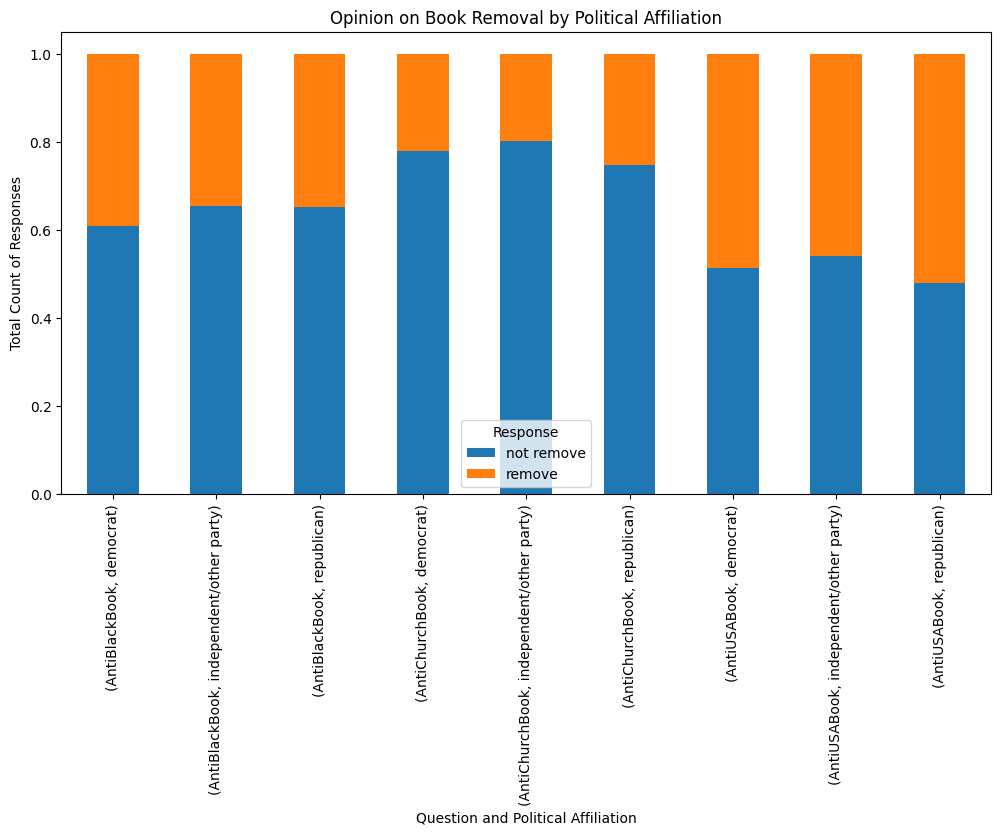

In [13]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Opinion on Book Removal by Political Affiliation')
plt.xlabel('Question and Political Affiliation')
plt.ylabel('Total Count of Responses')
plt.legend(title='Response')

plt.show()

# Figure 2

<Axes: xlabel='proportion_party_grouped', ylabel='response'>

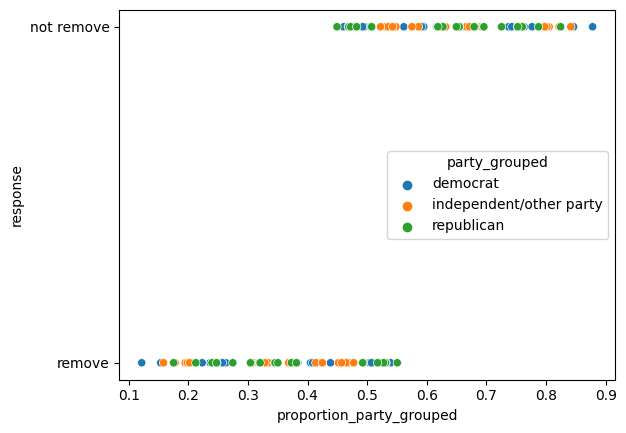

In [14]:
sns.scatterplot(data=proportions_by_party_response, x='proportion_party_grouped', y='response',hue='party_grouped')
# Figure 3

Summary of Data:

In [ ]:
responses_summary = org_party_church_race_religion[['AntiBlackBook', 'AntiUSABook', 'AntiChurchBook']].describe()
print("Summary of responses for each question:")
print(responses_summary)
party_counts = org_party_church_race_religion['partyid'].value_counts()
print("\nNumber of people within each party:")
print(party_counts)


Summary of responses for each question:
       AntiBlackBook AntiUSABook AntiChurchBook
count          11006       11006          11006
unique             2           2              2
top       not remove  not remove     not remove
freq            7056        5686           8590

Number of people within each party:
independent (neither, no response)    2011
strong democrat                       1981
not very strong democrat              1726
independent, close to democrat        1423
not very strong republican            1329
strong republican                     1191
independent, close to republican      1030
other party                            315
Name: partyid, dtype: int64


In [15]:
# Proportions of responses ('not remove' and 'remove') for each question
libath_summary = org_party_church_race_religion['AntiBlackBook'].value_counts(normalize=True)
libmslm_summary = org_party_church_race_religion['AntiUSABook'].value_counts(normalize=True)
librac_summary = org_party_church_race_religion['AntiChurchBook'].value_counts(normalize=True)

# Print the summaries
print("Summary for AntiBlackBook:")
print(libath_summary)
print("\nSummary for AntiUSABook:")
print(libmslm_summary)
print("\nSummary for AntiChurchBook:")
print(librac_summary)

Summary for AntiBlackBook:
not remove    0.632562
remove        0.367438
Name: AntiBlackBook, dtype: float64

Summary for AntiUSABook:
not remove    0.521765
remove        0.478235
Name: AntiUSABook, dtype: float64

Summary for AntiChurchBook:
not remove    0.791056
remove        0.208944
Name: AntiChurchBook, dtype: float64


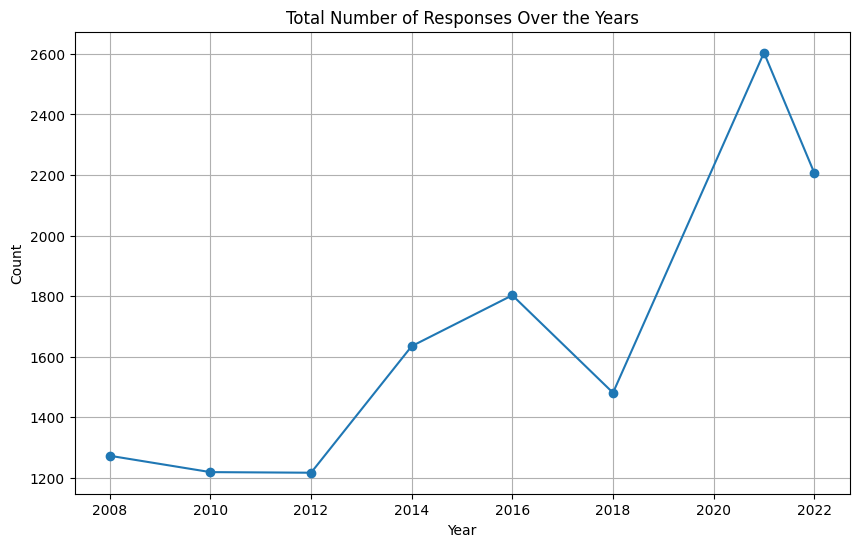

In [16]:
#Total Number of Reponses Over Years
grouped_data = org_party_church_race_religion.groupby('year').size()

grouped_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Total Number of Responses Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Figure 4

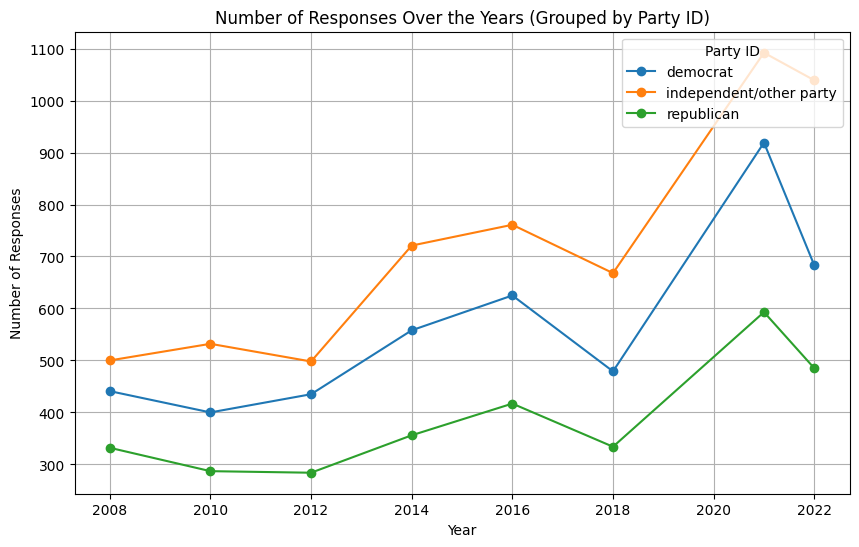

In [17]:
# Number of Responses Grouped by Party ID
group_party = {
    'independent, close to democrat': 'independent/other party',
    'independent (neither, no response)': 'independent/other party',
    'independent, close to republican': 'independent/other party',
    'other party': 'independent/other party',
    'not very strong democrat': 'democrat',
    'not very strong republican': 'republican',
    'strong democrat': 'democrat',
    'strong republican': 'republican'
}
grouped_data2 = church_race_religion.copy()
grouped_data2["group_party"] = grouped_data2["partyid"].replace(group_party)
grouped_data2 = grouped_data2.groupby(['year', 'group_party']).size().unstack(fill_value=0)

grouped_data2.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Number of Responses Over the Years (Grouped by Party ID)')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.grid(True)
plt.legend(title='Party ID', loc='upper right')
plt.show()

# # Figure 5

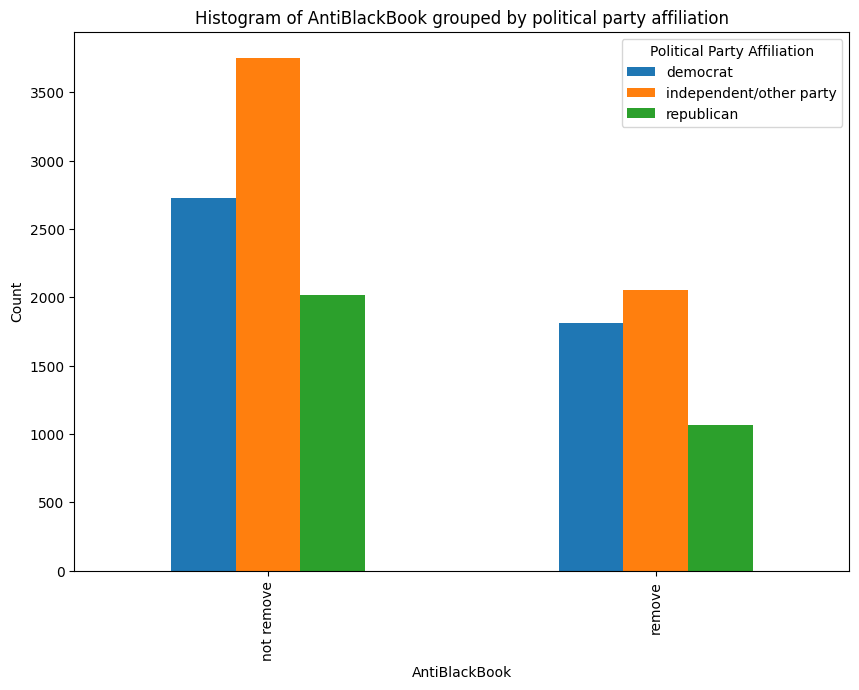

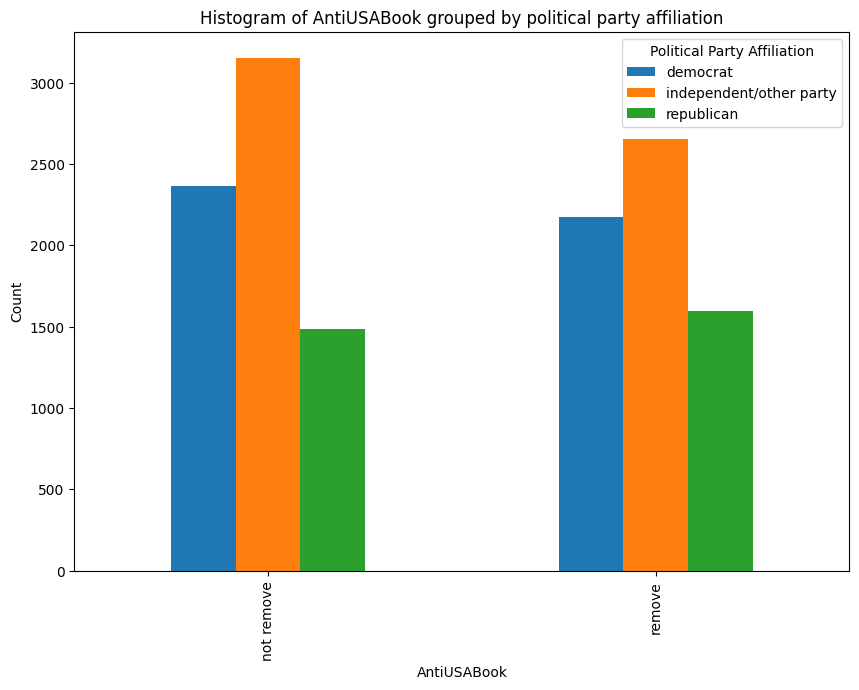

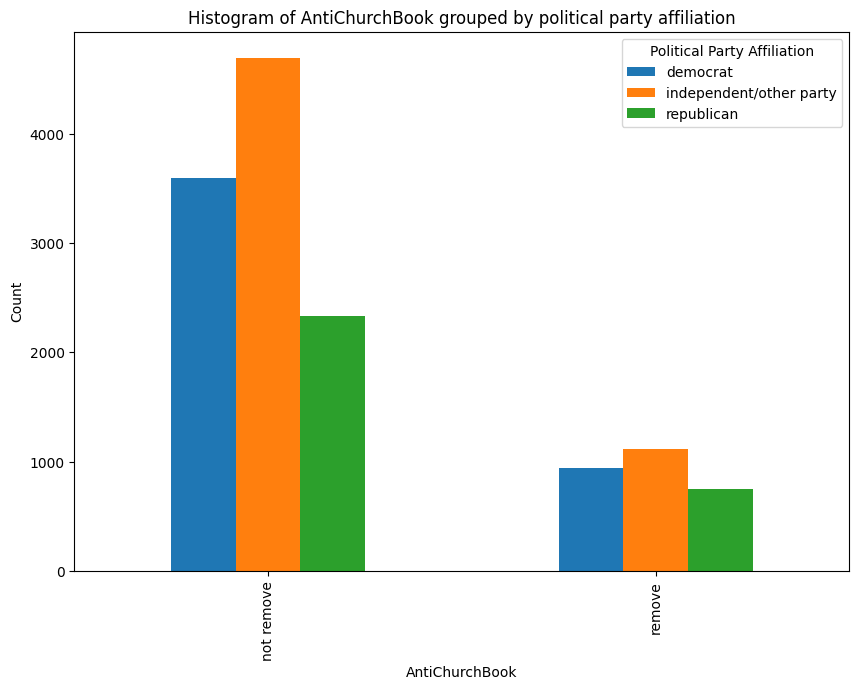

In [18]:
columns_to_plot = ['AntiBlackBook', 'AntiUSABook', 'AntiChurchBook']

for col in columns_to_plot:

    cross = pd.crosstab(org_party_church_race_religion[col], org_party_church_race_religion['party_grouped'])


    cross.plot(kind='bar', stacked=False, figsize=(10, 7))

    plt.title(f'Histogram of {col} grouped by political party affiliation')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Political Party Affiliation')
    plt.show()

    # Figure 6

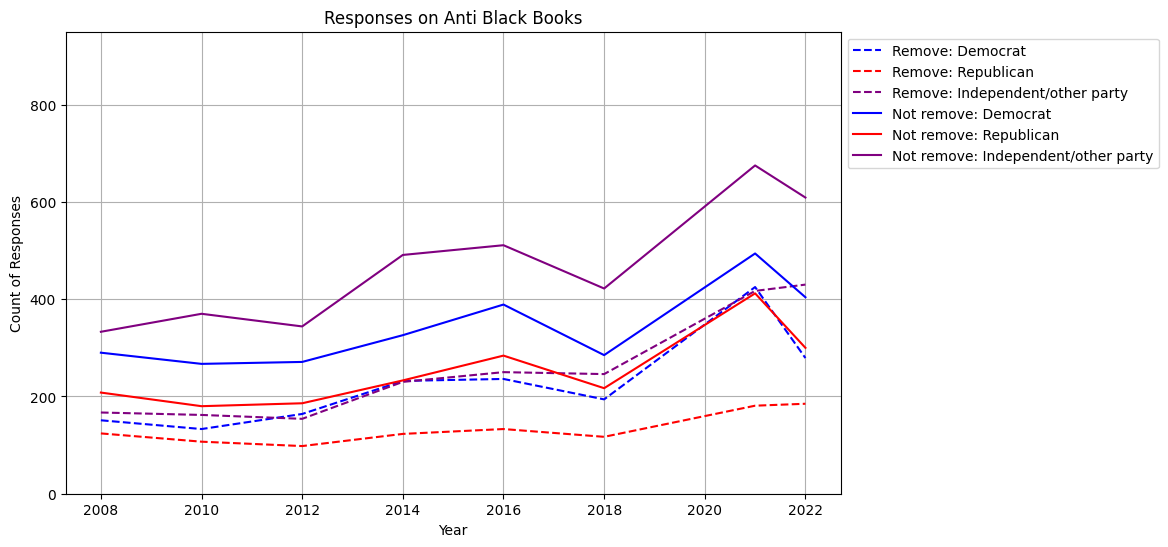

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'democrat': 'blue', 'republican': 'red', 'independent/other party': 'purple'}
linestyles = {'remove': '--', 'not remove': '-'}

for opinion in ['remove', 'not remove']:
    for party in ['democrat', 'republican', 'independent/other party']:
        filtered_df = org_party_church_race_religion[(org_party_church_race_religion['AntiBlackBook'] == opinion) & (org_party_church_race_religion['party_grouped'] == party)]
        response_count = filtered_df.groupby('year').size().reset_index(name='Count')
        label = f'{opinion.capitalize()}: {party.capitalize()}'
        plt.plot(
            response_count['year'],
            response_count['Count'],
            label=label,
            color=colors[party],
            linestyle=linestyles[opinion]
        )
ax.set_ylim(0, 950)
plt.xlabel('Year')
plt.ylabel('Count of Responses')
plt.title('Responses on Anti Black Books')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

    # Figure 7

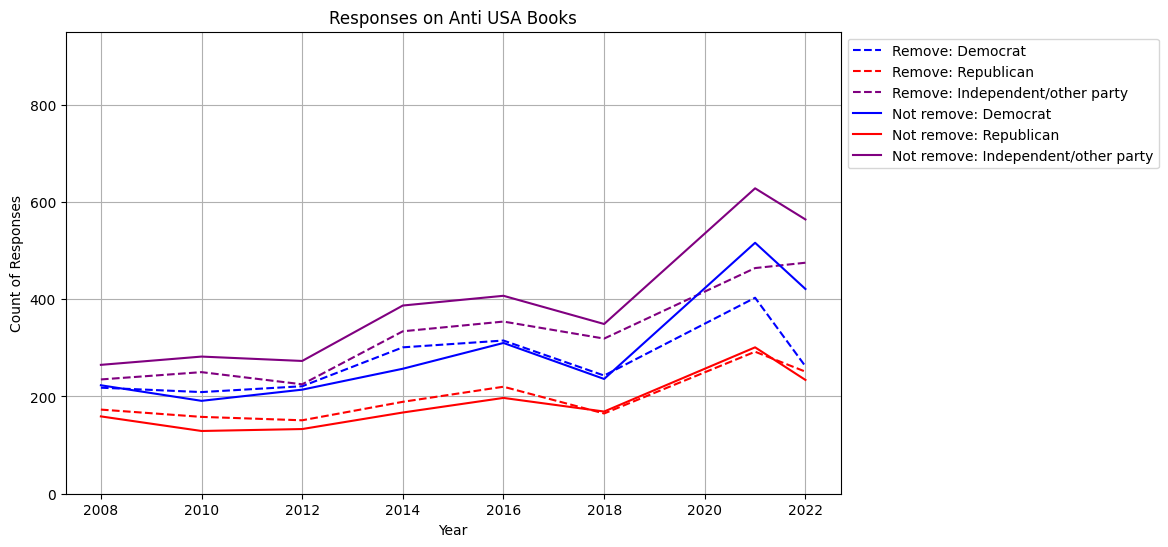

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'democrat': 'blue', 'republican': 'red', 'independent/other party': 'purple'}
linestyles = {'remove': '--', 'not remove': '-'}

for opinion in ['remove', 'not remove']:
    for party in ['democrat', 'republican', 'independent/other party']:
        filtered_df = org_party_church_race_religion[(org_party_church_race_religion['AntiUSABook'] == opinion) & (org_party_church_race_religion['party_grouped'] == party)]
        response_count = filtered_df.groupby('year').size().reset_index(name='Count')
        label = f'{opinion.capitalize()}: {party.capitalize()}'
        plt.plot(
            response_count['year'],
            response_count['Count'],
            label=label,
            color=colors[party],
            linestyle=linestyles[opinion]
        )
ax.set_ylim(0, 950)
plt.xlabel('Year')
plt.ylabel('Count of Responses')
plt.title('Responses on Anti USA Books')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()



    # Figure 8

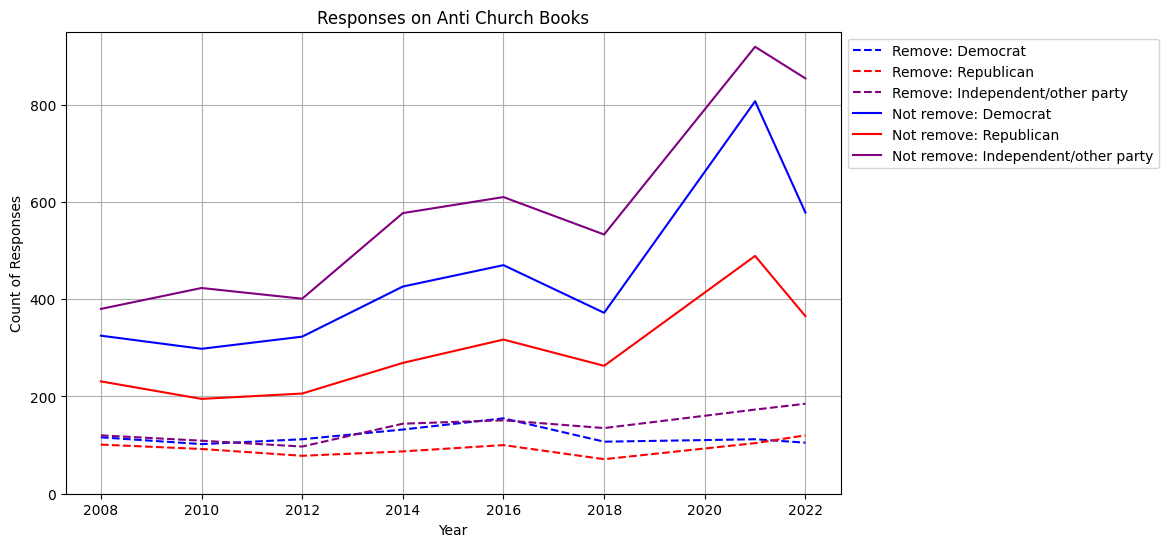

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'democrat': 'blue', 'republican': 'red', 'independent/other party': 'purple'}
linestyles = {'remove': '--', 'not remove': '-'}

for opinion in ['remove', 'not remove']:
    for party in ['democrat', 'republican', 'independent/other party']:
        filtered_df = org_party_church_race_religion[(org_party_church_race_religion['AntiChurchBook'] == opinion) & (org_party_church_race_religion['party_grouped'] == party)]
        response_count = filtered_df.groupby('year').size().reset_index(name='Count')
        label = f'{opinion.capitalize()}: {party.capitalize()}'
        plt.plot(
            response_count['year'],
            response_count['Count'],
            label=label,
            color=colors[party],
            linestyle=linestyles[opinion]
        )
ax.set_ylim(0, 950)
plt.xlabel('Year')
plt.ylabel('Count of Responses')
plt.title('Responses on Anti Church Books')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

    # Figure 9

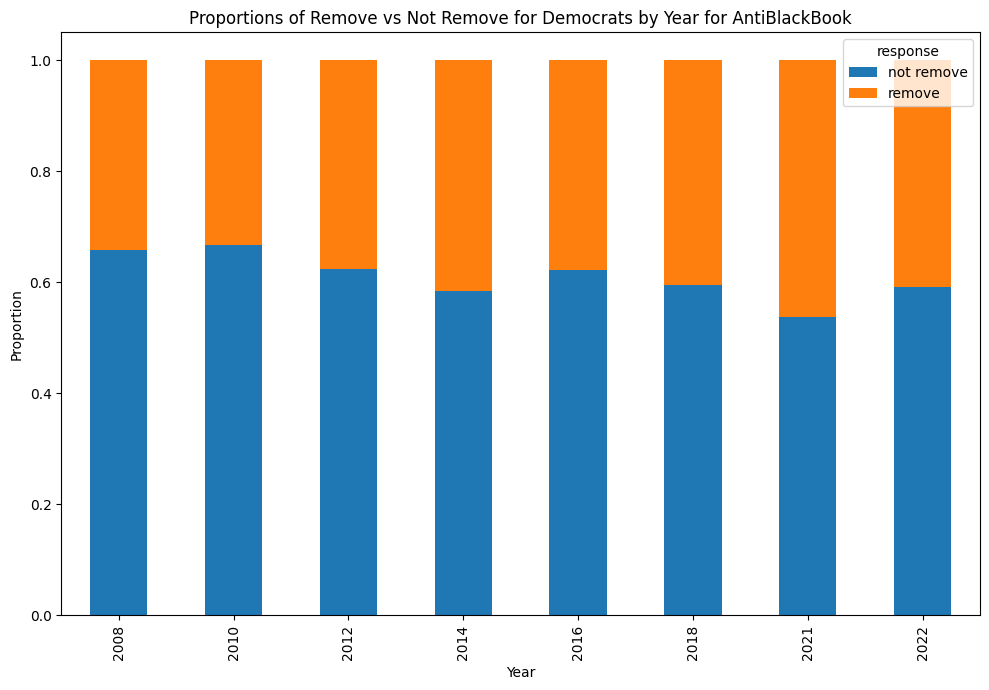

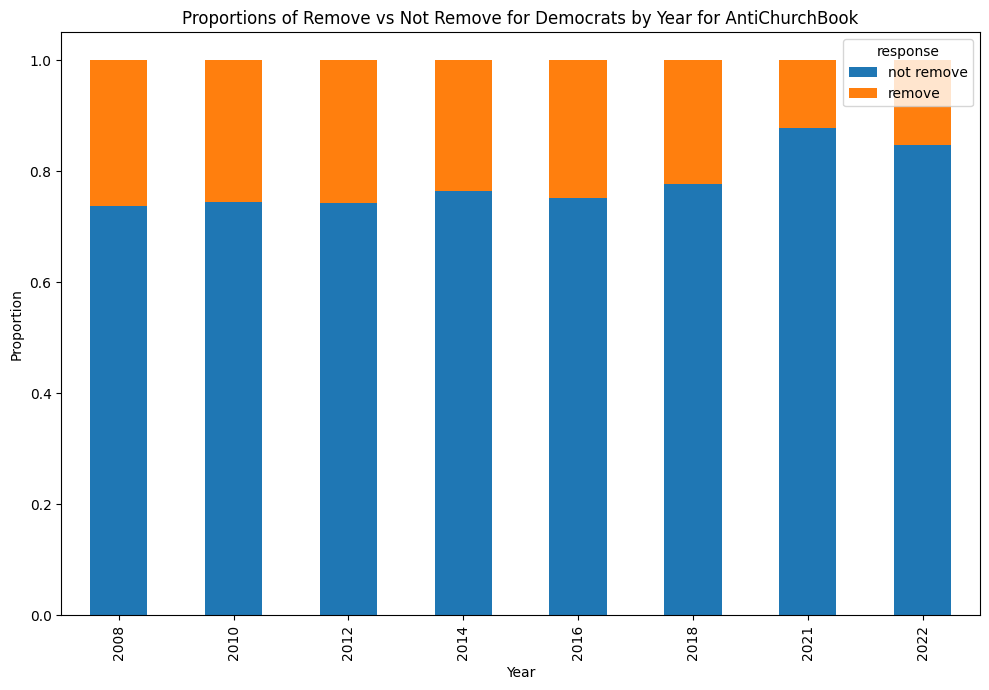

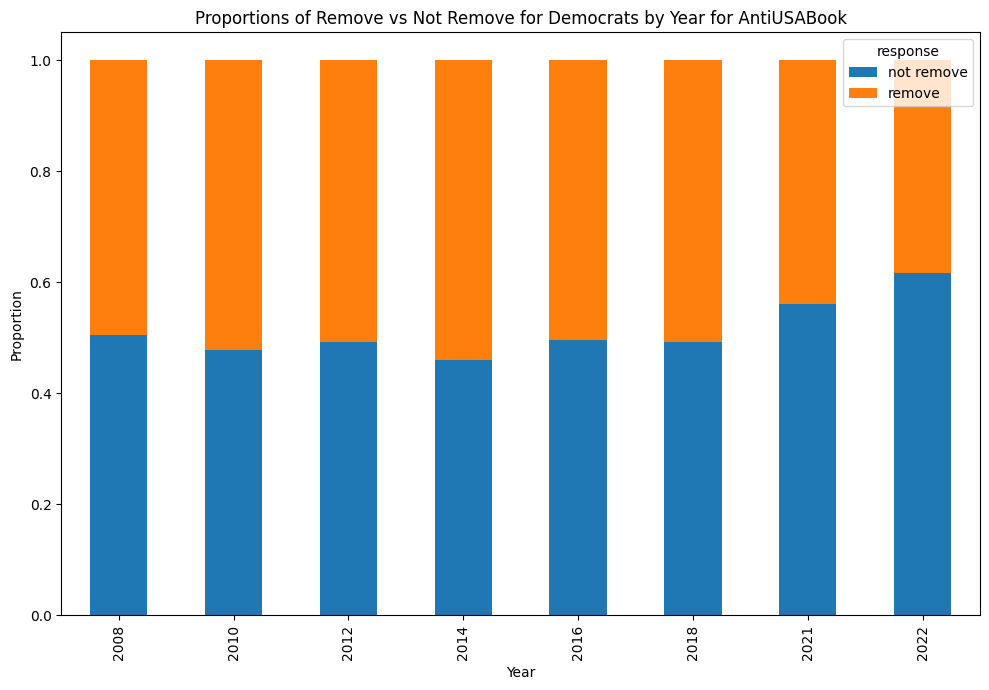

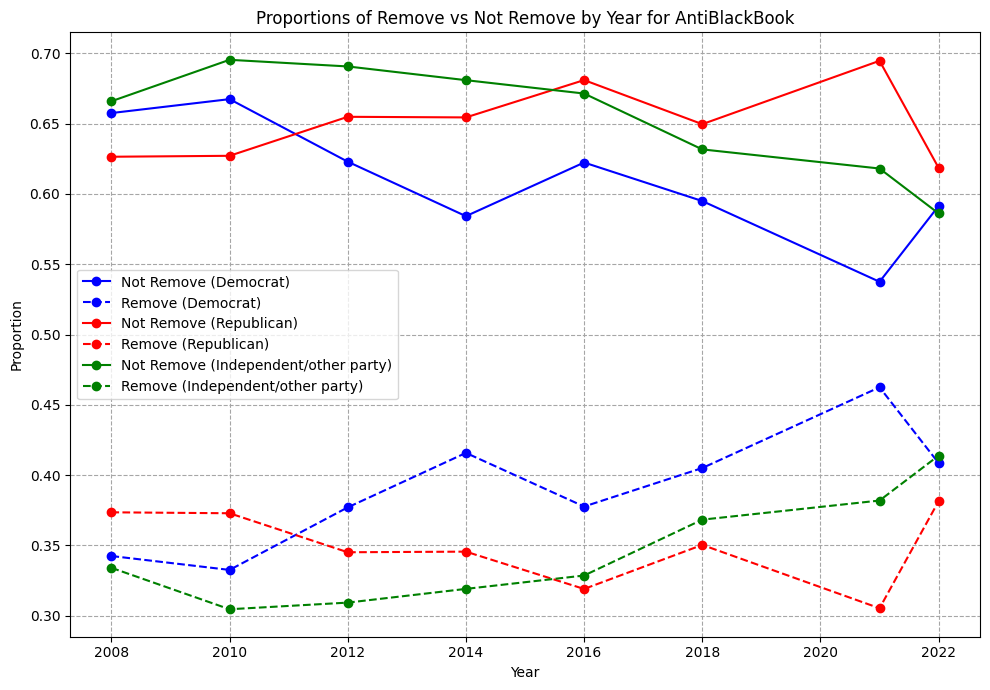

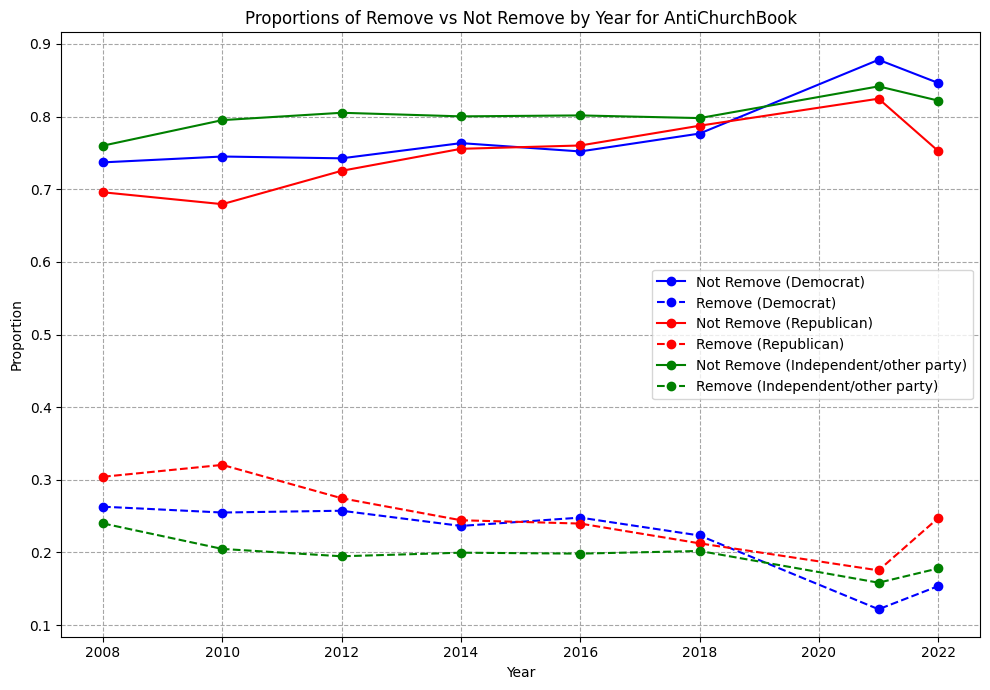

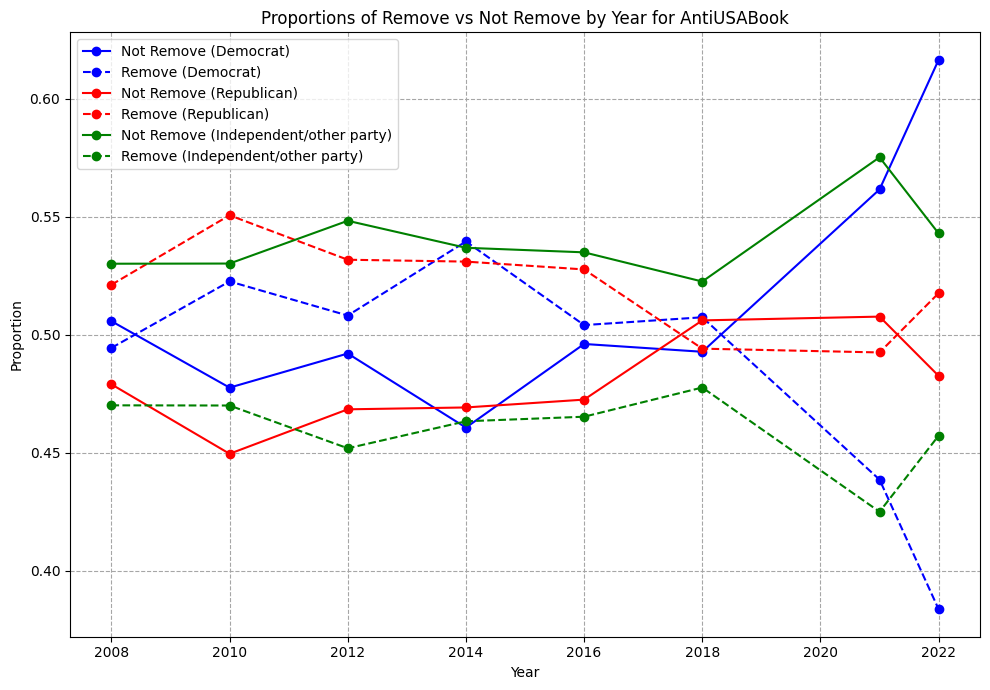

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
democrats_data = proportions_by_party_response[proportions_by_party_response['party_grouped'] == 'democrat']
books = democrats_data['question'].unique()

for book in books:
    book_data = democrats_data[democrats_data['question'] == book]

    pivot_data = book_data.pivot_table(index='year', columns='response', values='proportion_party_grouped', aggfunc='sum').reset_index()

    ax = pivot_data.plot(x='year', kind='bar', stacked=True, figsize=(10, 7))
    plt.title(f"Proportions of Remove vs Not Remove for Democrats by Year for {book}")
    plt.ylabel("Proportion")
    plt.xlabel("Year")
    plt.tight_layout()
    plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

books = proportions_by_party_response['question'].unique()
parties = ['democrat', 'republican', 'independent/other party']

color_map = {
    'democrat': 'blue',
    'republican': 'red',
    'independent/other party': 'green'
}

for book in books:
    plt.figure(figsize=(10, 7))
    for party in parties:
        party_book_data = proportions_by_party_response[(proportions_by_party_response['question'] == book) & (proportions_by_party_response['party_grouped'] == party)]

        pivot_data = party_book_data.pivot_table(index='year', columns='response', values='proportion_party_grouped', aggfunc='sum').reset_index()

        plt.plot(pivot_data['year'], pivot_data['not remove'], marker='o', label=f'Not Remove ({party.capitalize()})', color=color_map[party])
        plt.plot(pivot_data['year'], pivot_data['remove'], marker='o', label=f'Remove ({party.capitalize()})', linestyle='--', color=color_map[party])

    plt.title(f"Proportions of Remove vs Not Remove by Year for {book}")
    plt.ylabel("Proportion")
    plt.xlabel("Year")
    plt.legend()
    plt.grid(True, which="both", ls="--", c='0.65')
    plt.tight_layout()
    plt.show()



In [23]:
import pandas as pd
from scipy.stats import chi2_contingency
#Now we'll run a chi squared independence test. Chi squared test can be used to look at the association between categorical variables
#That is, it tests if our actual frequency distribution for our categorical variable differs froma distribution where the variables are not associated.
#resources: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
# https://stackoverflow.com/questions/64669448/understanding-scipy-stats-chisquare
# https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
# https://pythonfordatascienceorg.wordpress.com/chi-square-python/#chi-square



print("We are not conducting a  chi squared test for each year. The resources are commented in this code chunk")
print("Based on how we constructed this test, here is the interpretation: If we find a significant association")
print("it means that the observed distribution of votes across the 3 grouped parties is sufficiently different")
print("from what we'd expect if there were no association [the null hypothesis] between party affiliation")
print("and voting decision", '\n')


#selecting the data since 2008:
data_since_2008 = melted_org_party_church_race_religion[melted_org_party_church_race_religion['year'] >= 2008]

# unique years since 2008
list_of_years = data_since_2008['year'].unique() #just doing this instead of making a vector in case for some reason there is a year that is wrong somewhere

#book topics
list_of_book_types = data_since_2008['question'].unique()

n = 2006

#Loop through each year and each book type to perform chi-square test for each year
for year in list_of_years:
  n+=2
  if n == 2020:
    n = 2021

  print("Year = " + str(n)+"------------------------------------------------------------------------------------")
  for book in list_of_book_types:

        year_quest = data_since_2008[(data_since_2008['year'] == year) & (data_since_2008['question'] == book)]

        # Construct the contingency table
        contingency = pd.crosstab(year_quest['party_grouped'], year_quest['response'])

        # Apply the Chi-squared test
        chi2, p, _, expected = chi2_contingency(contingency) #this formatting is from chat_gpt. I could not find out how else to actually call the contingency function we imported


        print(f"Year: {year}, Book Type: {book}")
        print(f"Chi2 Value: {chi2}")
        print(f"P-Value: {p}")

        if p < 0.05:
            print("The p-value suggests a significant association between party affiliation and voting decision for this year and book type.")
        else:
            print("The p-value suggests no significant association between party affiliation and voting decision for this year and book type.")

        print("------\n")

  if n == 2021: #just a visual thing, but this resets the year correctly after 2021, since that is off the 2 yr pattern
    n = 2020


We are not conducting a  chi squared test for each year. The resources are commented in this code chunk
Based on how we constructed this test, here is the interpretation: If we find a significant association
it means that the observed distribution of votes across the 3 grouped parties is sufficiently different
from what we'd expect if there were no association [the null hypothesis] between party affiliation
and voting decision 

Year = 2008------------------------------------------------------------------------------------
Year: 2008, Book Type: AntiBlackBook
Chi2 Value: 1.441839472630038
P-Value: 0.4863047780461356
The p-value suggests no significant association between party affiliation and voting decision for this year and book type.
------

Year: 2008, Book Type: AntiUSABook
Chi2 Value: 2.101196828030022
P-Value: 0.34972840410144695
The p-value suggests no significant association between party affiliation and voting decision for this year and book type.
------

Year: 2008, Book Typ

In [ ]:
print("For this chi square test, we are not going by year, but simply looking at the aggregate votes across")
print("political parties for removing/not removing books. For a given book topic, if the p-value calculated")
print("is below the significance level of 0.05, this indicates that there is a significant association between")
print("the voters' political affiliation and their response to remove or not remove books of this type.\n")

from scipy.stats import chi2_contingency

# look at each unique book type through a loop, and call the chi sequare function
for topic in melted_org_party_church_race_religion['question'].unique(): #for each unique book topic (= 3 topics) we'll loop once through the question column
    book_type_data = melted_org_party_church_race_religion[melted_org_party_church_race_religion['question'] == topic]   #filter rows based on if they match whichever unique topic being evalueated in the loop

    con_table_affiliation_response = pd.crosstab(subset['party_grouped'], subset['response']) #our contingency table: provides frequency count for the combination of party_grouped and response values in the subset

    chi2, p, _, expected = chi2_contingency(con_table_affiliation_response) #this formatting is from chat_gpt. I could not find out how else to actually call the contingency function we imported


    print(f"Book topic '{topic}':")
    print(f"Chi2 val: {chi2}")
    print(f"P-val: {p}")
    print(f"Expected frequencies:\n{expected}\n")

    #I choose an alpha = 0.05
    if p < 0.05:
        print(f"P-value of {p} is below an alpha of 0.05, suggesting a significant association.\n")
    else:
        print(f"P-value of {p} is greater than an alpha of 0.05, suggesting no significant association.\n")

## Analysis